In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv("Transaksi_petshop.csv")
data

,id_transaksi,tanggal_transaksi,jumlah_terjual,produk1,kategori1,harga1,produk2,kategori2,harga2,produk3,kategori3,harga3,produk4,kategori4,harga4,total_harga,metode_pembayaran
0,JQeYXXi6,2024-06-29,3,Life Cat Pouch Dus,Makanan Kucing,108000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,4500,NaN,NaN,NaN,NaN,NaN,NaN,112500,Debit Card
1,AQ9BxDDX,2024-02-17,3,Hiasan Aquarium,Aksesoris Ikan,15000,Makanan Kucing Whiskas,Makanan Kucing,45000,NaN,NaN,NaN,NaN,NaN,NaN,60000,Cash
2,s7ETKTQ8,2024-11-01,1,Life Cat Can - Chicken & Salmon,Makanan Kucing,12000,Life Cat Tofu - Mango,Makanan Kucing,55833,Makanan Anjing Purina,Makanan Anjing,50000.0,Life Cat Can - Tuna,Makanan Kucing,11000.0,128833,Debit Card
3,UEflcOAa,2024-06-25,1,Life Cat Tofu - Mango,Makanan Kucing,55833,Mainan Anjing Kong,Mainan Anjing,20000,NaN,NaN,NaN,NaN,NaN,NaN,75833,qris
4,wSc48TrG,2024-01-08,5,Makanan Kucing Whiskas,Makanan Kucing,45000,Makanan Ikan Gupi,Makanan Ikan,35000,Life Cat Can - Kitten Tuna,Makanan Kucing,12000.0,Mainan Kucing ScratchPad,Mainan Kucing,25000.0,117000,qris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,do3EsNjE,2024-10-19,3,Life Cat Can - Kitten Salmon,Makanan Kucing,12024,Life Cat Can - Chicken & Salmon,Makanan Kucing,12000,Life Cat Can - Kitten Tuna,Makanan Kucing,12000.0,Life Cat Pouch - Salmon Adult,Makanan Kucing,4453.0,40477,Debit Card
1196,ZmybXgtd,2024-04-30,5,Life Cat Pouch - Salmon Adult,Makanan Kucing,4453,Life Cat Tofu - Macha,Makanan Kucing,55833,Life Cat Can - Kitten Salmon,Makanan Kucing,12024.0,NaN,NaN,NaN,72310,qris
1197,Y9mUXsQh,2024-07-21,4,Life Cat Pouch - Chicken adult,Makanan Kucing,4435,Life Cat Can - Tuna,Makanan Kucing,11000,NaN,NaN,NaN,NaN,NaN,NaN,15435,Debit Card
1198,qU6QYnxl,2024-04-28,5,Life Cat Pouch - Kitten Tuna,Makanan Kucing,4435,Life Cat Pouch Dus,Makanan Kucing,108000,Mainan Anjing Kong,Mainan Anjing,20000.0,NaN,NaN,NaN,132435,Debit Card


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_transaksi       1200 non-null   object 
 1   tanggal_transaksi  1200 non-null   object 
 2   jumlah_terjual     1200 non-null   int64  
 3   produk1            1200 non-null   object 
 4   kategori1          1200 non-null   object 
 5   harga1             1200 non-null   int64  
 6   produk2            1200 non-null   object 
 7   kategori2          1200 non-null   object 
 8   harga2             1200 non-null   int64  
 9   produk3            795 non-null    object 
 10  kategori3          795 non-null    object 
 11  harga3             795 non-null    float64
 12  produk4            375 non-null    object 
 13  kategori4          375 non-null    object 
 14  harga4             375 non-null    float64
 15  total_harga        1200 non-null   int64  
 16  metode_pembayaran  1200 

In [44]:
data.describe()

,jumlah_terjual,harga1,harga2,harga3,harga4,total_harga
count,1200.000000,1200.000000,1200.000000,795.000000,375.000000,1200.000000
mean,3.013333,27055.029167,27246.832500,26404.334591,25662.237333,79814.182500
std,1.388559,26845.663082,27232.553157,26975.947635,26120.103748,48075.948384
min,1.000000,4435.000000,4435.000000,4435.000000,4435.000000,8870.000000
25%,2.000000,4500.000000,4500.000000,4500.000000,4500.000000,41314.500000
50%,3.000000,15000.000000,15000.000000,12024.000000,12024.000000,72000.000000
75%,4.000000,45000.000000,45000.000000,45000.000000,45000.000000,112500.000000
max,5.000000,108000.000000,108000.000000,108000.000000,108000.000000,269666.000000


In [45]:
data.duplicated().sum()

np.int64(0)

In [46]:
data.isnull().sum()

id_transaksi           0
tanggal_transaksi      0
jumlah_terjual         0
produk1                0
kategori1              0
harga1                 0
produk2                0
kategori2              0
harga2                 0
produk3              405
kategori3            405
harga3               405
produk4              825
kategori4            825
harga4               825
total_harga            0
metode_pembayaran      0
dtype: int64

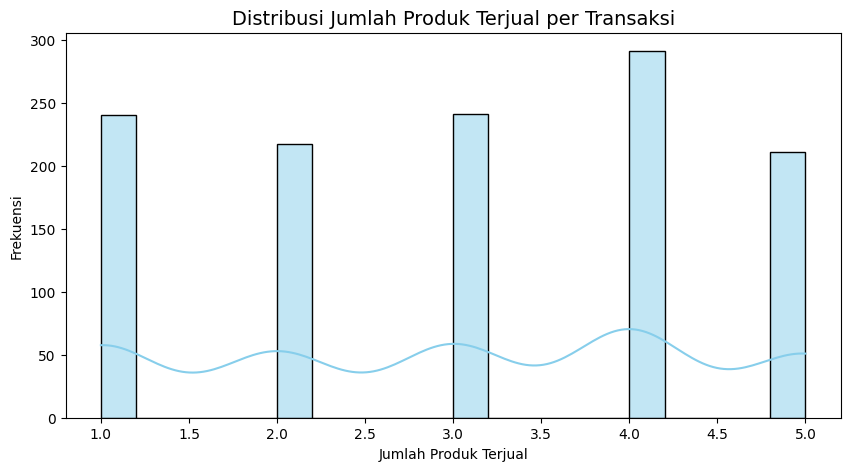

In [47]:
# Exploratory Data Analysis
# Plot 1: Distribution of 'jumlah_terjual'
plt.figure(figsize=(10, 5))
sns.histplot(data['jumlah_terjual'], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Jumlah Produk Terjual per Transaksi", fontsize=14)
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Frekuensi")
plt.show()

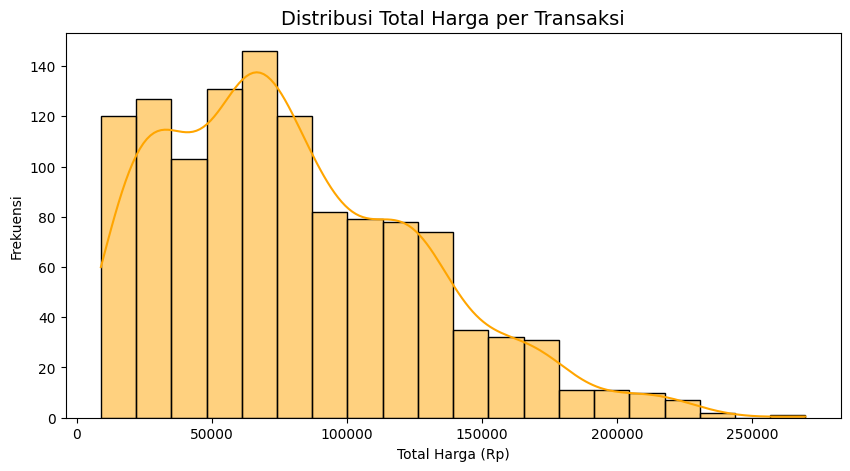

In [48]:
# Plot 2: Distribution of 'total_harga'
plt.figure(figsize=(10, 5))
sns.histplot(data['total_harga'], bins=20, kde=True, color="orange")
plt.title("Distribusi Total Harga per Transaksi", fontsize=14)
plt.xlabel("Total Harga (Rp)")
plt.ylabel("Frekuensi")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15800\2062931379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['metode_pembayaran'], palette="viridis", order=data['metode_pembayaran'].value_counts().index)


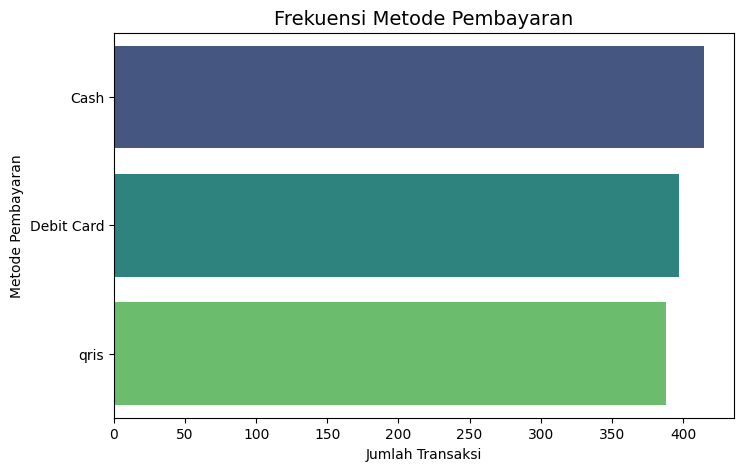

In [49]:
# Plot 3: Payment method frequency
plt.figure(figsize=(8, 5))
sns.countplot(y=data['metode_pembayaran'], palette="viridis", order=data['metode_pembayaran'].value_counts().index)
plt.title("Frekuensi Metode Pembayaran", fontsize=14)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.show()

In [50]:
# Detecting outliers using IQR
# Outliers in 'jumlah_terjual'
q1_jumlah, q3_jumlah = data['jumlah_terjual'].quantile([0.25, 0.75])
iqr_jumlah = q3_jumlah - q1_jumlah
outlier_jumlah = data[
    (data['jumlah_terjual'] < (q1_jumlah - 1.5 * iqr_jumlah)) | (data['jumlah_terjual'] > (q3_jumlah + 1.5 * iqr_jumlah))
]

# Outliers in 'total_harga'
q1_harga, q3_harga = data['total_harga'].quantile([0.25, 0.75])
iqr_harga = q3_harga - q1_harga
outlier_harga = data[
    (data['total_harga'] < (q1_harga - 1.5 * iqr_harga)) | (data['total_harga'] > (q3_harga + 1.5 * iqr_harga))
]

# Display results
print("\nJumlah Transaksi dengan Outlier pada 'jumlah_terjual':", len(outlier_jumlah))
print("Jumlah Transaksi dengan Outlier pada 'total_harga':", len(outlier_harga))



Jumlah Transaksi dengan Outlier pada 'jumlah_terjual': 0
Jumlah Transaksi dengan Outlier pada 'total_harga': 9


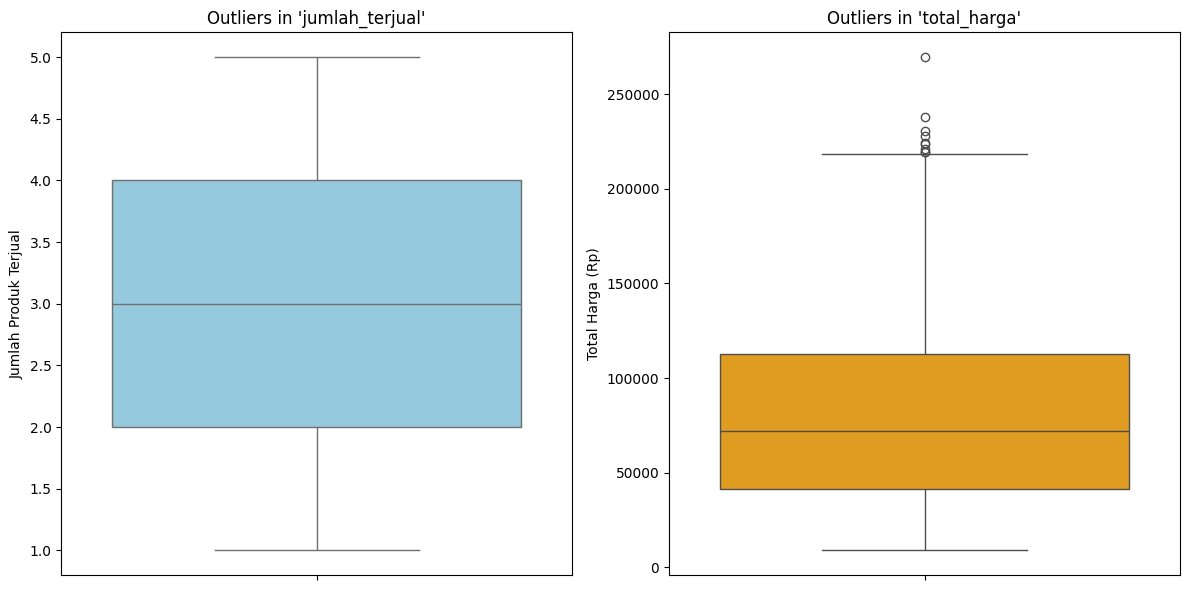

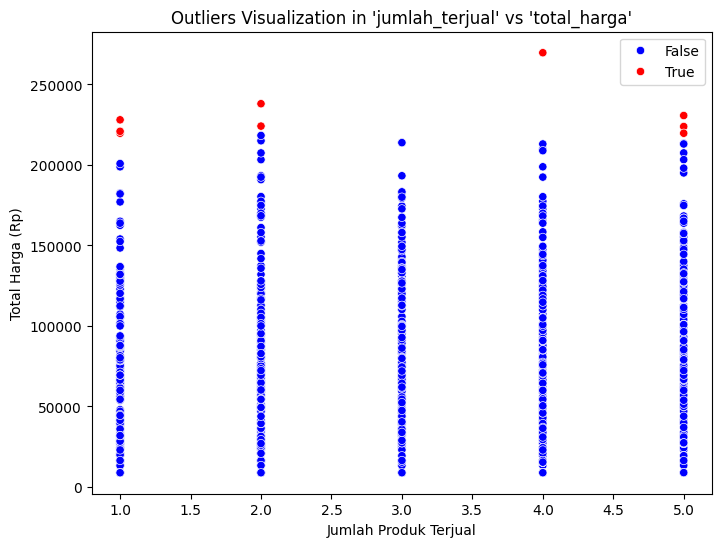

In [51]:
# prompt: buatkan visualisasi untuk outliernya

import matplotlib.pyplot as plt

# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['jumlah_terjual'], color="skyblue")
plt.title("Outliers in 'jumlah_terjual'")
plt.ylabel("Jumlah Produk Terjual")

plt.subplot(1, 2, 2)
sns.boxplot(y=data['total_harga'], color="orange")
plt.title("Outliers in 'total_harga'")
plt.ylabel("Total Harga (Rp)")

plt.tight_layout()
plt.show()


# Create scatter plot to visualize outliers in relation to each other
plt.figure(figsize=(8, 6))
sns.scatterplot(x='jumlah_terjual', y='total_harga', data=data, hue=data.index.isin(outlier_jumlah.index) | data.index.isin(outlier_harga.index), palette={True: 'red', False: 'blue'})
plt.title("Outliers Visualization in 'jumlah_terjual' vs 'total_harga'")
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Total Harga (Rp)")
plt.show()

DATA PREPARATION

In [52]:
# Fill missing values with 0
data.fillna(0, inplace=True)
data.head()

,id_transaksi,tanggal_transaksi,jumlah_terjual,produk1,kategori1,harga1,produk2,kategori2,harga2,produk3,kategori3,harga3,produk4,kategori4,harga4,total_harga,metode_pembayaran
0,JQeYXXi6,2024-06-29,3,Life Cat Pouch Dus,Makanan Kucing,108000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,4500,0,0,0.0,0,0,0.0,112500,Debit Card
1,AQ9BxDDX,2024-02-17,3,Hiasan Aquarium,Aksesoris Ikan,15000,Makanan Kucing Whiskas,Makanan Kucing,45000,0,0,0.0,0,0,0.0,60000,Cash
2,s7ETKTQ8,2024-11-01,1,Life Cat Can - Chicken & Salmon,Makanan Kucing,12000,Life Cat Tofu - Mango,Makanan Kucing,55833,Makanan Anjing Purina,Makanan Anjing,50000.0,Life Cat Can - Tuna,Makanan Kucing,11000.0,128833,Debit Card
3,UEflcOAa,2024-06-25,1,Life Cat Tofu - Mango,Makanan Kucing,55833,Mainan Anjing Kong,Mainan Anjing,20000,0,0,0.0,0,0,0.0,75833,qris
4,wSc48TrG,2024-01-08,5,Makanan Kucing Whiskas,Makanan Kucing,45000,Makanan Ikan Gupi,Makanan Ikan,35000,Life Cat Can - Kitten Tuna,Makanan Kucing,12000.0,Mainan Kucing ScratchPad,Mainan Kucing,25000.0,117000,qris


In [53]:
# Step 1: Decide data for analysis
# Selecting columns related to transactions and products
product_columns = ['produk1', 'produk2', 'produk3', 'produk4']
id_column = 'id_transaksi'

In [54]:
#  Step 3: Consolidation and cleaning
# Combine product columns into a single list per transaction
data['all_products'] = data[product_columns].values.tolist()

In [55]:
# Remove transactions with no products (all 'None')
data_cleaned = data[data['all_products'].apply(lambda x: any(prod != "None" for prod in x))]

# Remove duplicates in each transaction's product list
data_cleaned['all_products'] = data_cleaned['all_products'].apply(lambda x: list(set(x) - {"None"}))

# Create a simplified dataset for analysis
prepared_data = data_cleaned[[id_column, 'all_products']]

In [56]:
# Display the cleaned data and total transactions
print(prepared_data.head())
print(f"Total transactions after cleaning: {len(prepared_data)}")

  id_transaksi                                       all_products
0     JQeYXXi6  [0, Life Cat Pouch - Chicken Tuna Adult, Life ...
1     AQ9BxDDX       [0, Makanan Kucing Whiskas, Hiasan Aquarium]
2     s7ETKTQ8  [Makanan Anjing Purina, Life Cat Tofu - Mango,...
3     UEflcOAa     [0, Life Cat Tofu - Mango, Mainan Anjing Kong]
4     wSc48TrG  [Mainan Kucing ScratchPad, Makanan Kucing Whis...
Total transactions after cleaning: 1200


In [57]:
data.head()

,id_transaksi,tanggal_transaksi,jumlah_terjual,produk1,kategori1,harga1,produk2,kategori2,harga2,produk3,kategori3,harga3,produk4,kategori4,harga4,total_harga,metode_pembayaran,all_products
0,JQeYXXi6,2024-06-29,3,Life Cat Pouch Dus,Makanan Kucing,108000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,4500,0,0,0.0,0,0,0.0,112500,Debit Card,"[Life Cat Pouch Dus, Life Cat Pouch - Chicken ..."
1,AQ9BxDDX,2024-02-17,3,Hiasan Aquarium,Aksesoris Ikan,15000,Makanan Kucing Whiskas,Makanan Kucing,45000,0,0,0.0,0,0,0.0,60000,Cash,"[Hiasan Aquarium, Makanan Kucing Whiskas, 0, 0]"
2,s7ETKTQ8,2024-11-01,1,Life Cat Can - Chicken & Salmon,Makanan Kucing,12000,Life Cat Tofu - Mango,Makanan Kucing,55833,Makanan Anjing Purina,Makanan Anjing,50000.0,Life Cat Can - Tuna,Makanan Kucing,11000.0,128833,Debit Card,"[Life Cat Can - Chicken & Salmon, Life Cat Tof..."
3,UEflcOAa,2024-06-25,1,Life Cat Tofu - Mango,Makanan Kucing,55833,Mainan Anjing Kong,Mainan Anjing,20000,0,0,0.0,0,0,0.0,75833,qris,"[Life Cat Tofu - Mango, Mainan Anjing Kong, 0, 0]"
4,wSc48TrG,2024-01-08,5,Makanan Kucing Whiskas,Makanan Kucing,45000,Makanan Ikan Gupi,Makanan Ikan,35000,Life Cat Can - Kitten Tuna,Makanan Kucing,12000.0,Mainan Kucing ScratchPad,Mainan Kucing,25000.0,117000,qris,"[Makanan Kucing Whiskas, Makanan Ikan Gupi, Li..."


In [63]:
pip install --upgrade mlxtend


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
# Step 1: Ensure all elements in transactions are strings
transactions = [
    [str(item) for item in transaction if item]  # Convert all items to string and remove None or empty values
    for transaction in prepared_data['all_products']
]

# Step 2: Use TransactionEncoder to transform data into the required format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Generate Frequent Itemsets
frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True)

# Generate Association Rules
num_itemsets = frequent_itemsets['itemsets'].apply(len).sum()

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1, num_itemsets=num_itemsets)

# Sort rules by lift for better interpretability
rules = rules.sort_values(by="lift", ascending=False)

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets.head())

print("\nAssociation Rules:")
print(rules.head())


Frequent Itemsets:
    support                           itemsets
0  0.180833                  (Hiasan Aquarium)
1  0.163333  (Life Cat Can - Chicken & Salmon)
2  0.155833     (Life Cat Can - Kitten Salmon)
3  0.152500       (Life Cat Can - Kitten Tuna)
4  0.152500              (Life Cat Can - Tuna)

Association Rules:
                               antecedents  \
97   (Life Cat Pouch - Chicken Tuna Adult)   
96            (Life Cat Can - Kitten Tuna)   
23                       (Hiasan Aquarium)   
22                 (Life Cat Tofu - Mango)   
281             (Mainan Kucing ScratchPad)   

                               consequents  antecedent support  \
97            (Life Cat Can - Kitten Tuna)            0.179167   
96   (Life Cat Pouch - Chicken Tuna Adult)            0.152500   
23                 (Life Cat Tofu - Mango)            0.180833   
22                       (Hiasan Aquarium)            0.166667   
281               (Makanan Kucing Whiskas)            0.170000   

     

In [74]:
print(frequent_itemsets.head())
print(frequent_itemsets.shape)

    support                           itemsets
0  0.180833                  (Hiasan Aquarium)
1  0.163333  (Life Cat Can - Chicken & Salmon)
2  0.155833     (Life Cat Can - Kitten Salmon)
3  0.152500       (Life Cat Can - Kitten Tuna)
4  0.152500              (Life Cat Can - Tuna)
(171, 2)


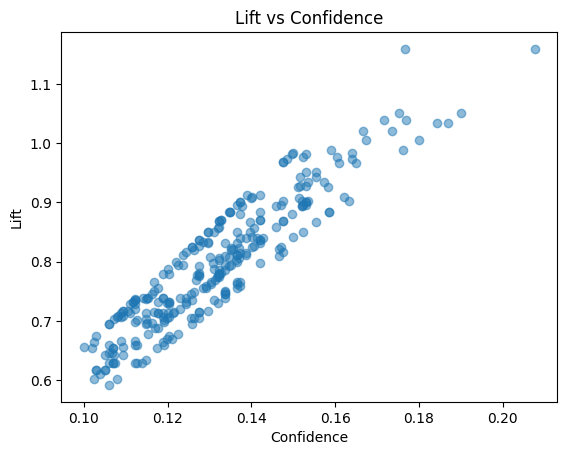

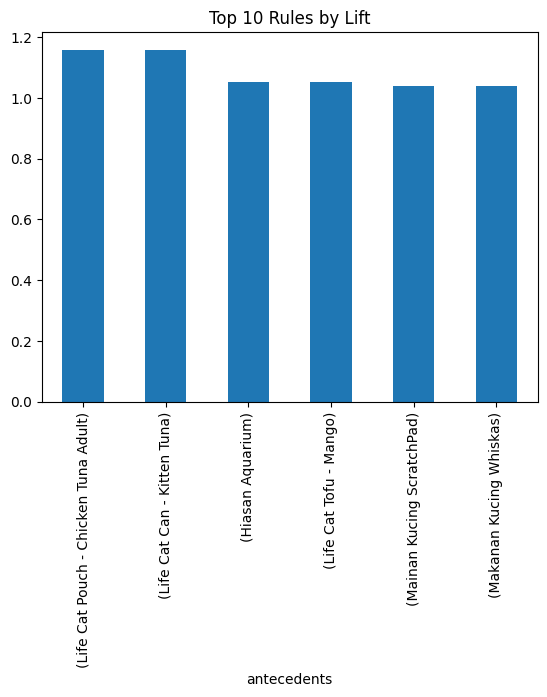

In [75]:
# Ensure columns are in the correct numerical data type
rules['lift'] = rules['lift'].astype(float)
rules['confidence'] = rules['confidence'].astype(float)
rules['support'] = rules['support'].astype(float)

# Visualize Lift vs Confidence
import matplotlib.pyplot as plt

plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.title('Lift vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

# Bar Plot for Top Rules by Lift
top_rules = rules.nlargest(6, 'lift')
if top_rules.empty:
    print("Tidak ada aturan dengan lift yang relevan.")
else:
    top_rules.plot(kind='bar', x='antecedents', y='lift', legend=False)
    plt.title('Top 10 Rules by Lift')
    plt.show()



In [76]:
# Membuat fungsi rekomendasi berdasarkan aturan asosiasi
def recommend_products(purchased_products, rules):
    recommendations = set()
    for product in purchased_products:
        # Cari aturan di mana produk menjadi antecedents
        matching_rules = rules[rules['antecedents'].apply(lambda x: product in x)]
        for _, rule in matching_rules.iterrows():
            recommendations.update(rule['consequents'])
    return recommendations - set(purchased_products)  # Hindari rekomendasi produk yang sudah dibeli

# Contoh penggunaan
purchased = {'Makanan Kucing'}  # Produk yang ada di keranjang
recommended = recommend_products(purchased, rules)
print(f"Rekomendasi untuk {purchased}: {recommended}")


Rekomendasi untuk {'Makanan Kucing'}: set()


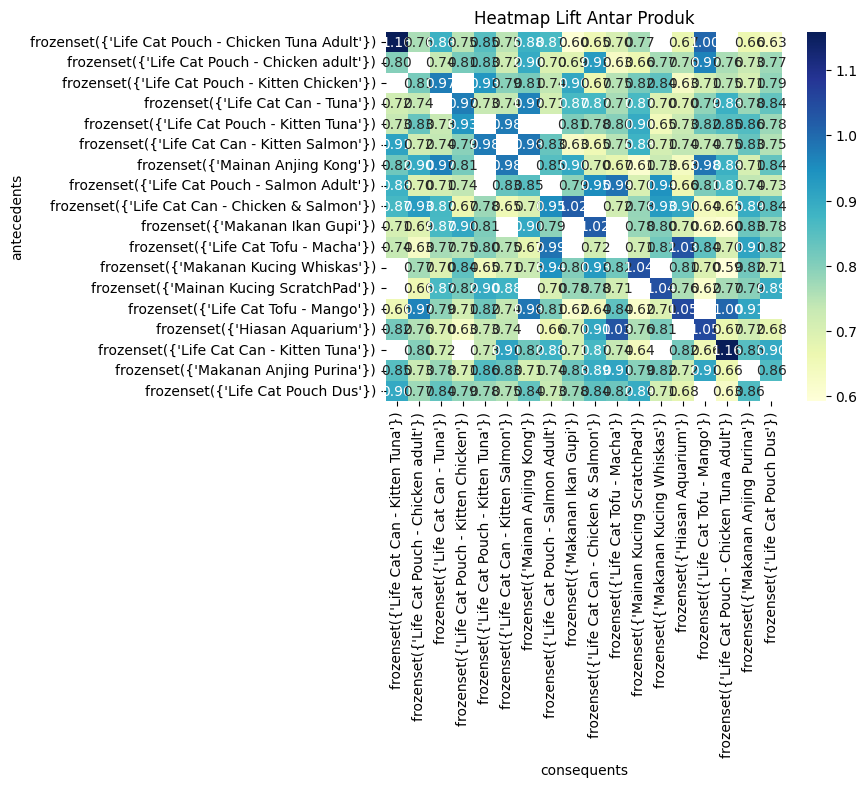

In [77]:
# Heatmap antara produk antecedents dan consequents
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap Lift Antar Produk")
plt.show()